In [1]:
# Mounting Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import NearestNeighbors
import textwrap

In [3]:
# Read data
books = pd.read_csv("/content/drive/MyDrive/GoodReads_100k_books.csv")

In [4]:
books.head(5)

,author,bookformat,desc,genre,img,isbn,isbn13,link,pages,rating,reviews,title,totalratings
0,Laurence M. Hauptman,Hardcover,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",https://i.gr-assets.com/images/S/compressed.ph...,002914180X,9.78E+12,https://goodreads.com/book/show/1001053.Betwee...,0,3.52,5,Between Two Fires: American Indians in the Civ...,33
1,"Charlotte Fiell,Emmanuelle Dirix",Paperback,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",https://i.gr-assets.com/images/S/compressed.ph...,1906863482,9.78E+12,https://goodreads.com/book/show/10010552-fashi...,576,4.51,6,Fashion Sourcebook 1920s,41
2,Andy Anderson,Paperback,The seminal history and analysis of the Hungar...,"Politics,History",https://i.gr-assets.com/images/S/compressed.ph...,948984147,9.78E+12,https://goodreads.com/book/show/1001077.Hungar...,124,4.15,2,Hungary 56,26
3,Carlotta R. Anderson,Hardcover,"""All-American Anarchist"" chronicles the life a...","Labor,History",https://i.gr-assets.com/images/S/compressed.ph...,814327079,9.78E+12,https://goodreads.com/book/show/1001079.All_Am...,324,3.83,1,All-American Anarchist: Joseph A. Labadie and ...,6
4,Jean Leveille,NaN,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,https://i.gr-assets.com/images/S/compressed.ph...,2761920813,NaN,https://goodreads.com/book/show/10010880-les-o...,177,4.00,1,Les oiseaux gourmands,1


In [5]:
# Remove duplicates
books = books.drop_duplicates()

In [6]:
books.size

1300000

In [7]:
# Filter out unrealistic ratings (e.g., below 1 or above 10)
books = books[(books['rating'] >= 1) & (books['rating'] <= 10)]

In [8]:
books.size

1279694

In [9]:
# Select only relevant columns
books = books[['isbn', 'title', 'author', 'rating', 'reviews', 'img', 'desc', 'genre', 'pages']]


In [10]:
books.head(5)

,isbn,title,author,rating,reviews,img,desc,genre,pages
0,002914180X,Between Two Fires: American Indians in the Civ...,Laurence M. Hauptman,3.52,5,https://i.gr-assets.com/images/S/compressed.ph...,Reveals that several hundred thousand Indians ...,"History,Military History,Civil War,American Hi...",0
1,1906863482,Fashion Sourcebook 1920s,"Charlotte Fiell,Emmanuelle Dirix",4.51,6,https://i.gr-assets.com/images/S/compressed.ph...,Fashion Sourcebook - 1920s is the first book i...,"Couture,Fashion,Historical,Art,Nonfiction",576
2,948984147,Hungary 56,Andy Anderson,4.15,2,https://i.gr-assets.com/images/S/compressed.ph...,The seminal history and analysis of the Hungar...,"Politics,History",124
3,814327079,All-American Anarchist: Joseph A. Labadie and ...,Carlotta R. Anderson,3.83,1,https://i.gr-assets.com/images/S/compressed.ph...,"""All-American Anarchist"" chronicles the life a...","Labor,History",324
4,2761920813,Les oiseaux gourmands,Jean Leveille,4.00,1,https://i.gr-assets.com/images/S/compressed.ph...,"Aujourdâ€™hui, lâ€™oiseau nous invite Ã sa ta...",NaN,177


In [11]:
# Rename columns for consistency and readability
books.rename(columns={
    'isbn': 'ISBN',
    'title': 'Title',
    'author': 'Author',
    'rating': 'Rating',
    'reviews': 'No. of Ratings',
    'img': 'Image',
    'desc': 'Description',
    'genre': 'Genre',
    'pages': 'Pages'
}, inplace=True)

In [12]:
# Remove rows with null values in critical columns
books.dropna(subset=['Genre', 'Description', 'Image', 'ISBN'], inplace=True)

# Reset the index after cleaning
books.reset_index(drop=True, inplace=True)

# Filter books with at least 50 ratings
final_books = books[books['No. of Ratings'] >= 50].reset_index(drop=True)

In [13]:
final_books.head(5)

,ISBN,Title,Author,Rating,No. of Ratings,Image,Description,Genre,Pages
0,143037013,Happiness: Lessons from a New Science,Richard Layard,3.73,85,https://i.gr-assets.com/images/S/compressed.ph...,There is a paradox at the heart of our lives. ...,"Psychology,Nonfiction,Economics,Science,Philos...",320
1,385333706,After Long Silence,Helen Fremont,4.00,328,https://i.gr-assets.com/images/S/compressed.ph...,"""To this day, I don't even know what my mother...","Autobiography,Memoir,Nonfiction,World War II,H...",368
2,1414270658,Parnassus on Wheels,Christopher Morley,4.03,1214,https://i.gr-assets.com/images/S/compressed.ph...,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",152
3,767923634,Irrational Exuberance,Robert J. Shiller,3.98,275,https://i.gr-assets.com/images/S/compressed.ph...,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",304
4,765315696,Halo: Contact Harvest,Joseph Staten,3.98,271,https://i.gr-assets.com/images/S/compressed.ph...,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",396


In [14]:
import numpy as np

# Parameters
num_users = 1000
num_books = len(final_books)
ratings_distribution = [1, 2, 3, 4, 5]  # Possible ratings
ratings_weights = [0.1, 0.15, 0.4, 0.25, 0.1]  # Weight for each rating

# Step 1: Assign random user IDs
final_books['user_id'] = np.random.randint(1, num_users + 1, num_books)

# Step 2: Generate user ratings based on the distribution
final_books['user_rating'] = np.random.choice(
    ratings_distribution,
    size=num_books,
    p=ratings_weights  # Probability weights for ratings
)

# Step 3: Encode user IDs and ISBNs into categorical codes for NCF
final_books['user_id'] = final_books['user_id'].astype('category').cat.codes
final_books['ISBN'] = final_books['ISBN'].astype('category').cat.codes


In [15]:


# Simulate user-book ratings for 1000 users
#num_users = 1000

# Generate random user IDs and ratings directly
#final_books['user_id'] = np.random.randint(1, num_users + 1, len(final_books))
#final_books['user_rating'] = np.random.randint(1, 6, len(final_books))

# Encode user IDs and ISBNs into categorical codes for NCF
#final_books['user_id'] = final_books['user_id'].astype('category').cat.codes
#final_books['ISBN'] = final_books['ISBN'].astype('category').cat.codes


In [16]:
final_books.head()

,ISBN,Title,Author,Rating,No. of Ratings,Image,Description,Genre,Pages,user_id,user_rating
0,3730,Happiness: Lessons from a New Science,Richard Layard,3.73,85,https://i.gr-assets.com/images/S/compressed.ph...,There is a paradox at the heart of our lives. ...,"Psychology,Nonfiction,Economics,Science,Philos...",320,683,4
1,13926,After Long Silence,Helen Fremont,4.00,328,https://i.gr-assets.com/images/S/compressed.ph...,"""To this day, I don't even know what my mother...","Autobiography,Memoir,Nonfiction,World War II,H...",368,936,3
2,2792,Parnassus on Wheels,Christopher Morley,4.03,1214,https://i.gr-assets.com/images/S/compressed.ph...,"Roger Mifflin is part pixie, part sage, part n...","Fiction,Writing,Books About Books,Classics,Hum...",152,106,5
3,21717,Irrational Exuberance,Robert J. Shiller,3.98,275,https://i.gr-assets.com/images/S/compressed.ph...,As Robert Shillerâ€™s new 2009 preface to his ...,"Economics,Economics,Finance,Business,Nonfictio...",304,474,4
4,21565,Halo: Contact Harvest,Joseph Staten,3.98,271,https://i.gr-assets.com/images/S/compressed.ph...,"This is how it began...,It is the year 2524. H...","Science Fiction,Fiction,Games,Video Games,Spor...",396,304,3


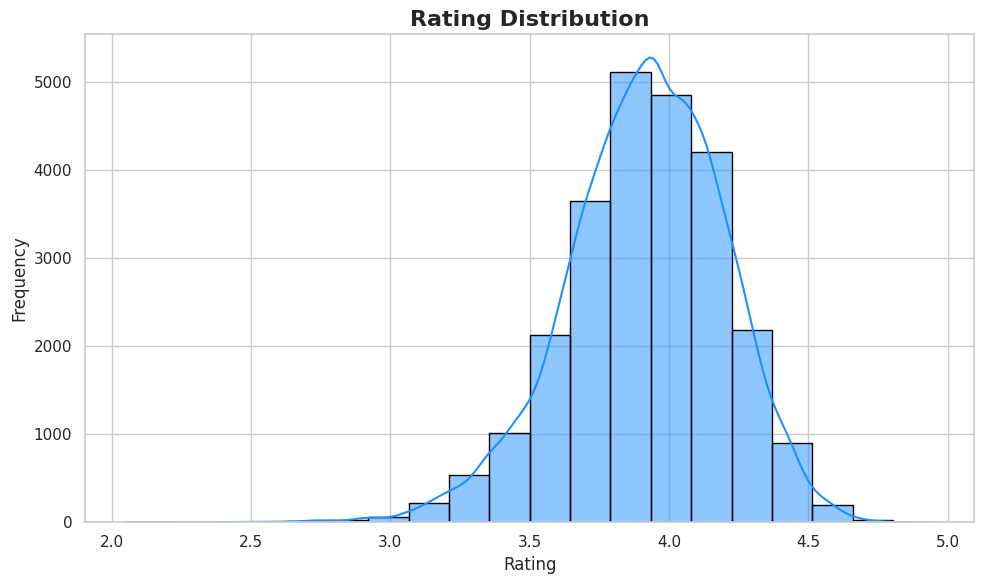

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import Counter

# General plot settings for aesthetics
sns.set_theme(style="whitegrid")

# Plot Rating Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=final_books, x='Rating', bins=20, kde=True, color='dodgerblue', edgecolor='black')
plt.title('Rating Distribution', fontsize=16, weight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()


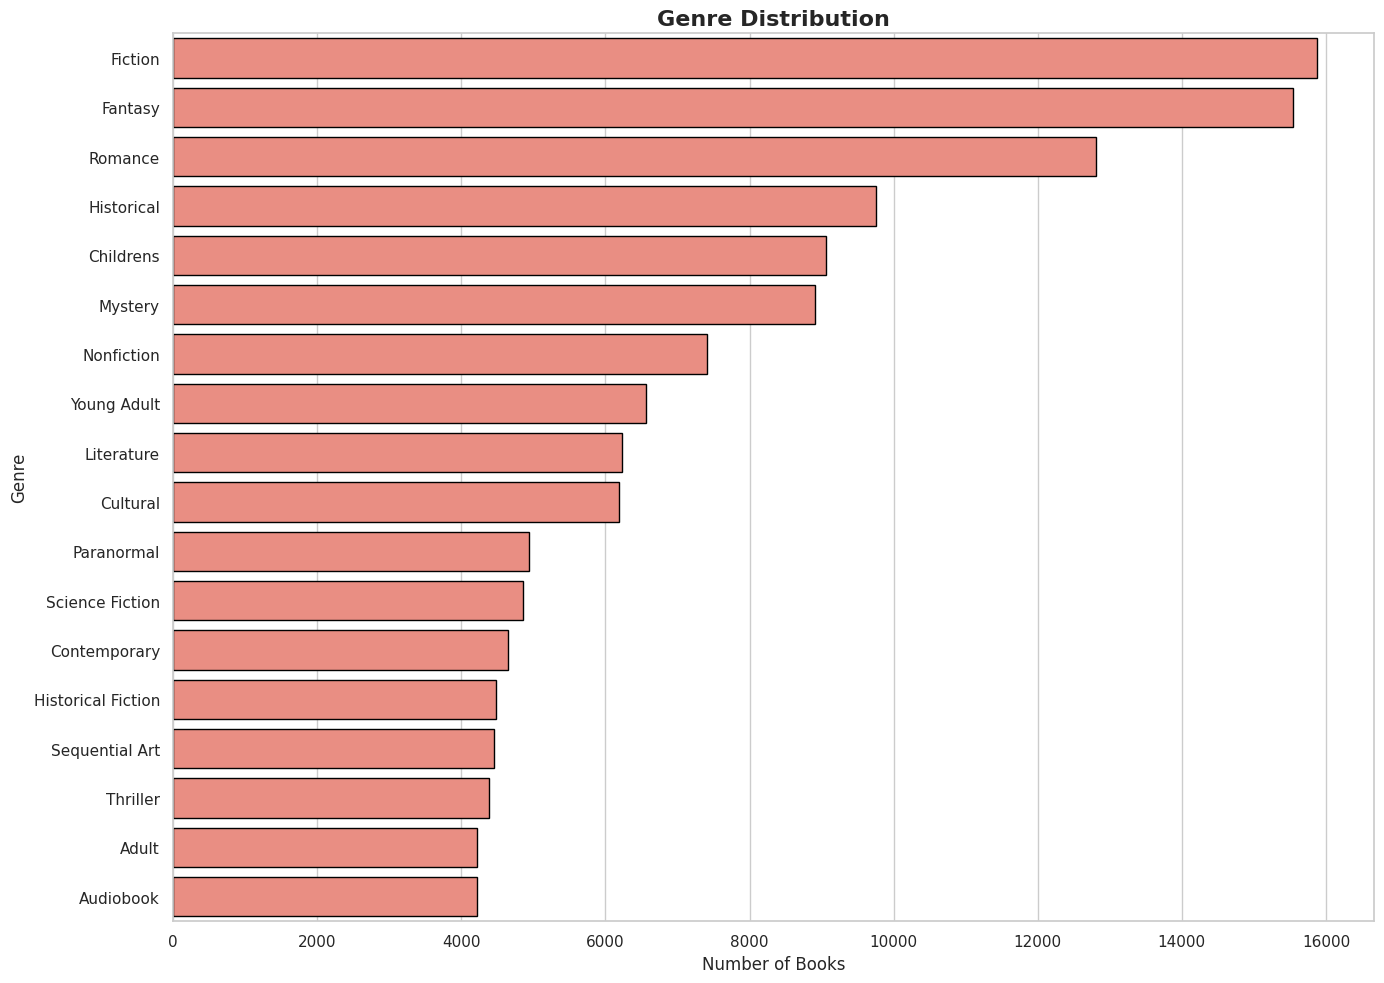

In [18]:
# Plot Genre Distribution
# Extract and count distinct genres
genre_list = final_books['Genre'].dropna().str.split(',')
all_genres = [genre.strip() for sublist in genre_list for genre in sublist]

genre_counts = Counter(all_genres)

# Create a DataFrame for the genre counts
genre_counts_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])
genre_counts_df = genre_counts_df.sort_values(by='Count', ascending=False)

# Filter genres with more than 4000 books
filtered_genre_counts_df = genre_counts_df[genre_counts_df['Count'] > 4000]

# Plot the genre distribution
plt.figure(figsize=(14, 10))
sns.barplot(data=filtered_genre_counts_df, y='Genre', x='Count', edgecolor='black', color='salmon')
plt.title('Genre Distribution', fontsize=16, weight='bold')
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.tight_layout()
plt.show()

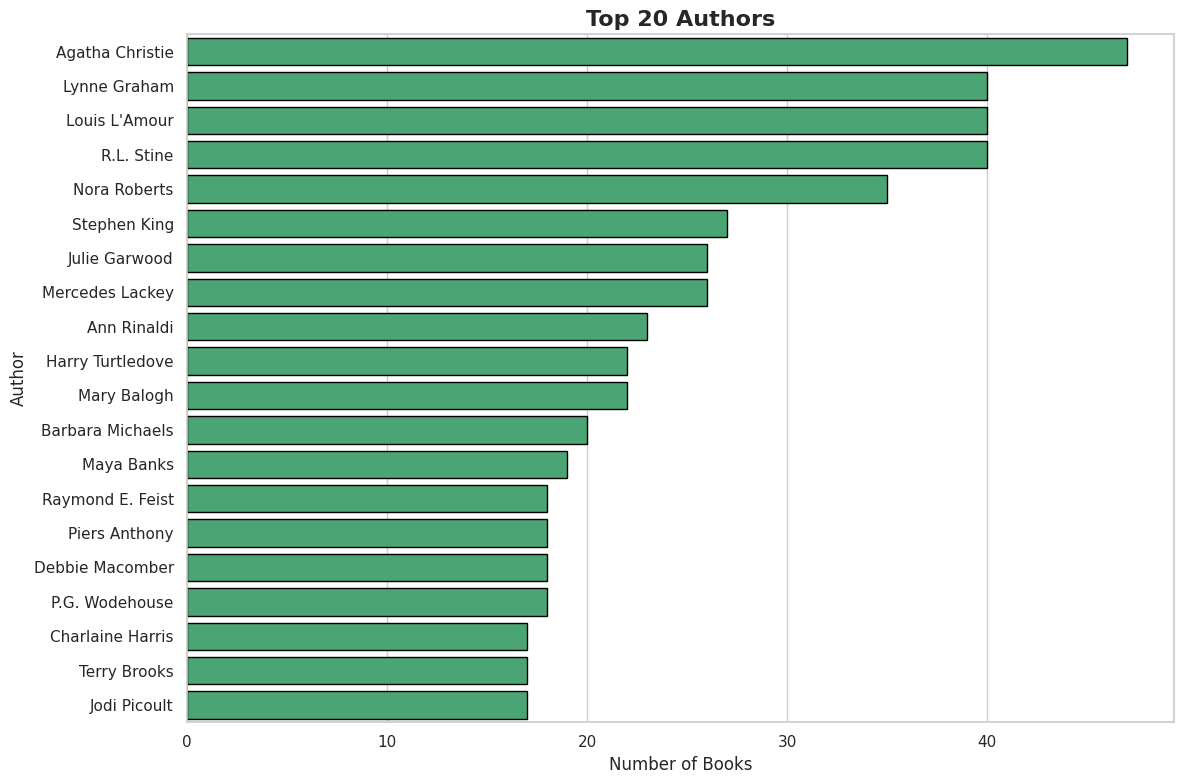

In [19]:
# Plot Top Authors
plt.figure(figsize=(12, 8))
top_authors = final_books['Author'].value_counts().head(20)
sns.barplot(y=top_authors.index, x=top_authors.values, edgecolor='black', color='mediumseagreen')
plt.title('Top 20 Authors', fontsize=16, weight='bold')
plt.xlabel('Number of Books', fontsize=12)
plt.ylabel('Author', fontsize=12)
plt.tight_layout()
plt.show()

In [20]:
final_books.head(1)


,ISBN,Title,Author,Rating,No. of Ratings,Image,Description,Genre,Pages,user_id,user_rating
0,3730,Happiness: Lessons from a New Science,Richard Layard,3.73,85,https://i.gr-assets.com/images/S/compressed.ph...,There is a paradox at the heart of our lives. ...,"Psychology,Nonfiction,Economics,Science,Philos...",320,683,4


## **User-Based Collaborative Filtering: How It Works**

This recommendation approach finds books for a target user (`user_id`) by identifying other users with similar tastes based on their book ratings. It recommends books that these similar users have rated highly but the target user hasn’t read yet.

### **Key Steps in the Process**

### **1. Create the User-Book Matrix**
We create a pivot table where:
- **Rows**: Represent users (`user_id`).
- **Columns**: Represent books (`Title`).
- **Values**: Are ratings given by users (`user_rating`).

This matrix forms the foundation for comparing users based on their book preferences.

---

### **2. Train the KNN Model**
A **K-Nearest Neighbors (KNN)** model is trained using the user-book matrix:
- The model compares users based on their rows in the matrix.
- It uses **Cosine Similarity** to measure how closely two users' ratings align, regardless of the absolute values.

---

### **3. Find Similar Users**
For a given target user (`user_id`):
- The system identifies `n` other users with the most similar rating patterns (smallest cosine distances).
- For example, if User 375 is the target:
  - Similar Users might be User 120, User 580, and User 420.

---

### **4. Retrieve Books Rated by Similar Users**
The system collects all the books rated by the similar users. These books form a pool of potential recommendations.

---

### **5. Recommend Top Books**
Among the books rated by the similar users:
1. Calculate the **average rating** for each book based on the ratings given by the similar users.
2. Exclude books the target user has already rated.
3. Sort the remaining books by their average ratings in descending order.
4. Select the top `n` books as recommendations.

---

### **6. Incorporate Descriptions**
For each recommended book:
- The system displays its **Title**, **Average Rating**, and **Description**.
- Descriptions provide additional context, helping the user decide whether the recommendation aligns with their interests.

---

### **Example Workflow**

#### **Input**: Target User = User 375

1. **Find Similar Users**:
   - Similar Users: User 120, User 580, User 420.
   - Cosine Distances: 0.12, 0.15, 0.18 (lower = more similar).

2. **Retrieve Books Rated by Similar Users**:
   - Books: *Book A*, *Book B*, *Book C*.

3. **Recommend Top Books**:
   - Calculate Average Ratings:
     - **Book A**: 4.7
     - **Book B**: 4.5
     - **Book C**: 4.3
   - Top Recommendations:
     - **Book A**: "A thrilling tale of mystery and suspense."
     - **Book B**: "A heartwarming story of friendship and love."
     - **Book C**: "An exciting journey through space and time."

---


### **Benefits**
- Personalized recommendations based on the target user’s preferences.
- Context-aware suggestions with detailed descriptions.
- Dynamically adapts to new ratings and users.

In [21]:

# Fit the Nearest Neighbors model for users
user_book_matrix = final_books.pivot_table(index='user_id', columns='Title', values='user_rating').fillna(0)
user_knn = NearestNeighbors(metric='cosine', algorithm='brute')
user_knn.fit(user_book_matrix)

# Function to recommend books for a user with detailed descriptions
def recommend_books_with_details(user_id, n=5):
    # Find similar users
    distances, indices = user_knn.kneighbors([user_book_matrix.loc[user_id]], n_neighbors=6)
    similar_users = indices[0][1:]  # Exclude the user itself

    # Get books rated highly by similar users
    similar_user_ids = user_book_matrix.index[similar_users]
    recommended_books = final_books[final_books['user_id'].isin(similar_user_ids)]

    # Aggregate the top-rated books among neighbors
    top_books = (recommended_books.groupby('Title')
                 .agg({'user_rating': 'mean'})
                 .sort_values(by='user_rating', ascending=False))

    # Add book details to the recommendations
    top_books_details = top_books.reset_index().merge(final_books, on='Title', how='left').drop_duplicates('Title')
    return top_books_details[['Title', 'Author', 'Genre', 'Rating', 'No. of Ratings', 'Pages', 'Description', 'Image']]

In [22]:
user_id = 375
number_of_recommendations = 2
recommended_books_with_details = recommend_books_with_details(user_id=user_id, n=number_of_recommendations)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(



Books Recommended for User 12:

Title: The First Christmas: What the Gospels Really Teach About Jesus's Birth
Author: Marcus J. Borg,John Dominic Crossan
Genre: Religion,Holiday,Christmas,Nonfiction,Religion,Theology,Christian,Spirituality,History,Religion,Christianity,Religion,Faith,Christianity,New Testament
Rating: 3.98 (based on 123 ratings)
Pages: 258
Description:
The perfect follow-up to ,The Last Week,, Borg and Crossan's ,The First Christmas, is an account of
the two nativity narratives in the Gospels of Matthew and Luke. Borg and Crossan focus on
discovering the actual literary story that the Gospels tell. Borg and Crossan feel that history has
biased our readings of these texts; we are all so familiar with the nativity story that we don't
really hear it anymore. ,The First Christmas, will help us see the nativity story afresh and be able
to appreciate the powerful message the Gospels contain.

--------------------------------------------------
Title: Cardcaptor Sakura, Book 

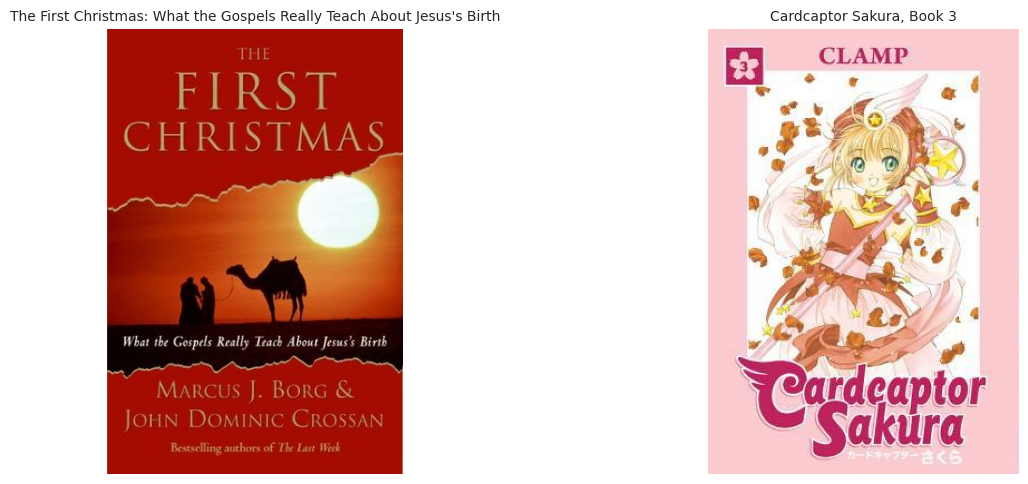

In [23]:
# Function to display recommendations in a styled format
def display_recommendations_styled(recommendations, user_id, n=5,):
    print(f"\n{'=' * 50}")
    print(f"Books Recommended for User {user_id}:")
    print(f"{'=' * 50}\n")

    for idx, row in recommendations.head(n).iterrows():
        print(f"Title: {row['Title']}")
        print(f"Author: {row['Author']}")
        print(f"Genre: {row['Genre']}")
        print(f"Rating: {row['Rating']} (based on {row['No. of Ratings']} ratings)")
        print(f"Pages: {row['Pages']}")
        #print(f"Description:\n  {row['Description'][:200]}...")  # Indented description with truncation
        print("Description:")
        # Wrap text for the description
        wrapped_description = textwrap.fill(row['Description'], width=100)
        print(f"{wrapped_description}\n")
        print("-" * 50)

def display_images_from_dataframe(df, n=5):
    plt.figure(figsize=(15, 5))  # Adjust figure size

    for i, (idx, row) in enumerate(df.head(n).iterrows()):  # Enumerate to ensure sequential indexing
        image_url = row['Image']
        try:
            # Fetch the image from the URL
            response = requests.get(image_url)
            response.raise_for_status()

            # Open the image using Pillow
            img = Image.open(BytesIO(response.content))

            # Display the image inline with matplotlib
            plt.subplot(1, n, i + 1)  # Create a subplot for each image
            plt.imshow(img)
            plt.title(row['Title'], fontsize=10)  # Show the book title as the title of the image
            plt.axis('off')  # Turn off axes for better visualization
        except Exception as e:
            print(f"Error displaying image for '{row['Title']}': {e}")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example: Call the function with a DataFrame of recommendations
display_recommendations_styled(recommended_books_with_details, user_id=12, n=number_of_recommendations,)

display_images_from_dataframe(recommended_books_with_details, n=number_of_recommendations)

In [24]:
recommended_books_with_details.head(5)

,Title,Author,Genre,Rating,No. of Ratings,Pages,Description,Image
0,The First Christmas: What the Gospels Really T...,"Marcus J. Borg,John Dominic Crossan","Religion,Holiday,Christmas,Nonfiction,Religion...",3.98,123,258,"The perfect follow-up to ,The Last Week,, Borg...",https://i.gr-assets.com/images/S/compressed.ph...
1,"Cardcaptor Sakura, Book 3","CLAMP,Anita Sengupta,Carol Fox","Sequential Art,Manga,Fantasy,Sequential Art,Co...",4.55,68,593,Now that Sakura has proven herself as a magici...,https://i.gr-assets.com/images/S/compressed.ph...
2,The Study of Language,George Yule,"Humanities,Linguistics,Nonfiction,Humanities,L...",3.98,150,340,"Designed for beginners, this best-selling text...",https://i.gr-assets.com/images/S/compressed.ph...
3,Superman: For Tomorrow,"Brian Azzarello,Jim Lee,Scott Williams","Sequential Art,Comics,Sequential Art,Graphic N...",3.38,142,320,The complete 12-part saga from SUPERMAN #204-2...,https://i.gr-assets.com/images/S/compressed.ph...
4,The Train,"Georges Simenon,Robert Baldick","Fiction,Historical,Historical Fiction,War,Worl...",3.80,206,144,Against all expectations Marcel FerÃ³n has mad...,https://i.gr-assets.com/images/S/compressed.ph...


### Filtering based on a specific user input genre

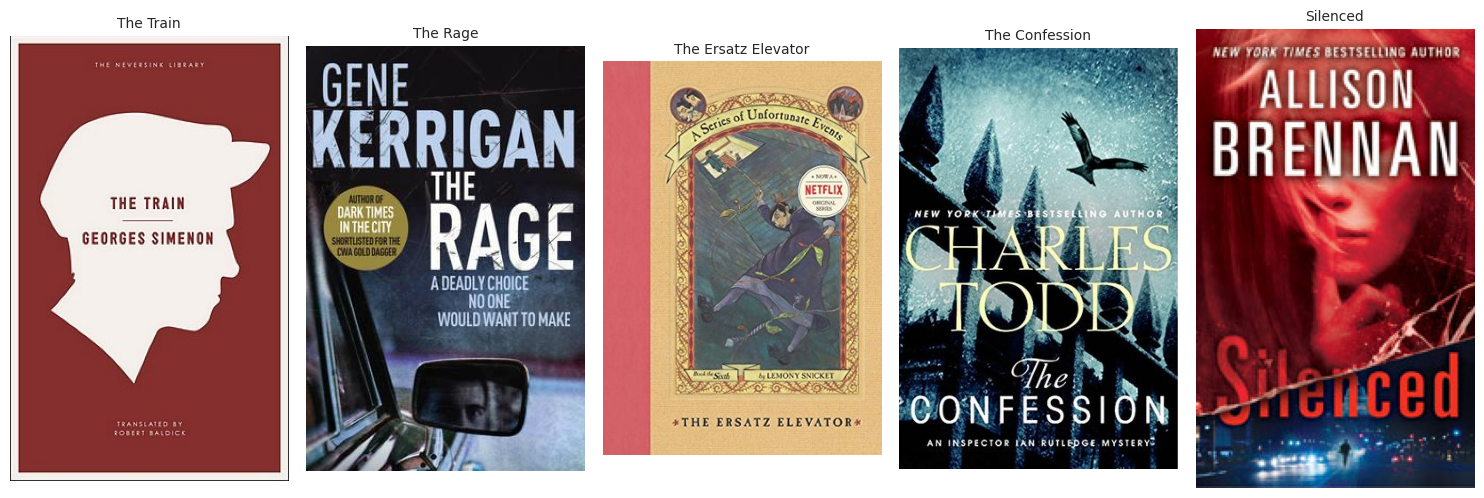

In [25]:
# Function to get top 5 books by genre
def display_top_books_by_genre(genre, all_books, n=5):
    # Filter books by the specified genre
    filtered_books = all_books[all_books['Genre'].str.contains(genre, case=False, na=False)]

    # Sort the filtered books by rating in descending order
    #top_books = filtered_books.sort_values(by='Rating', ascending=False).head(n)
    top_books = filtered_books.head(n)

    return top_books


def display_images_from_dataframe(df, n=5):
    plt.figure(figsize=(15, 5))  # Adjust figure size

    for i, (idx, row) in enumerate(df.head(n).iterrows()):  # Enumerate to ensure sequential indexing
        image_url = row['Image']
        try:
            # Fetch the image from the URL
            response = requests.get(image_url)
            response.raise_for_status()

            # Open the image using Pillow
            img = Image.open(BytesIO(response.content))

            # Display the image inline with matplotlib
            plt.subplot(1, n, i + 1)  # Create a subplot for each image
            plt.imshow(img)
            plt.title(row['Title'], fontsize=10)  # Show the book title as the title of the image
            plt.axis('off')  # Turn off axes for better visualization
        except Exception as e:
            print(f"Error displaying image for '{row['Title']}': {e}")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example: Display top 5 Mystery books
top_books = display_top_books_by_genre("Mystery", recommended_books_with_details, n=5)

display_images_from_dataframe(top_books, n=5)

## **Book Recommendation System: Finding Similar Books**

This recommendation system uses **content-based filtering** with a **K-Nearest Neighbors (KNN)** model to find books similar to a given book title. The system also displays the recommendations both as text and with their cover images.

---

### **1. Preprocess the Data**

The data is preprocessed to ensure it's clean and ready for modeling:
- **Missing Values**: Rows with missing values are removed.
- **Categorical Encoding**: The `Author` column is encoded as a numerical feature using `LabelEncoder`.
- **Feature Selection**: Features like `Rating`, `No. of Ratings`, `Pages`, and `Author` are selected for similarity calculation.
- **Normalization**: Numerical features are scaled using `StandardScaler` to ensure fair comparison.

---

### **2. Train the KNN Model**

A **K-Nearest Neighbors (KNN)** model is trained to find similar books based on the selected features:
- **Distance Metric**: Euclidean distance is used to calculate similarity between books.
- **Neighbors**: The number of neighbors (`n_neighbors`) is set to 6, including the book itself.

---

### **3. Find Similar Books**

The system retrieves books similar to a given book (`book_title`):
1. Finds the feature vector of the input book.
2. Uses the KNN model to calculate distances between the input book and all other books.
3. Returns the top 5 most similar books (excluding the input book itself).

---

### **4. Display Recommendations**

#### **Text Display**
- Each recommended book is displayed with its:
  - **Title**
  - **Author**
  - **Rating**
  - **Genre**
  - **Number of Pages**
  - **Description**

#### **Image Display**
- Cover images for the recommended books are fetched from their URLs and displayed inline using `matplotlib`.

---

### **Example Workflow**

#### **Input**: `"Between Good and Evil: A Master Profiler's Hunt for Society's Most Violent Predators"`

#### **Output**:
1. **Text-Based Recommendations**:
   - Displays details like title, author, rating, genre, and description.
2. **Image-Based Recommendations**:
   - Shows the cover images of the recommended books.


Books similar to 'Between Good and Evil: A Master Profiler's Hunt for Society's Most Violent Predators':

Title: The Greek Myths: Stories of the Greek Gods and Heroes Vividly Retold
Author: Robin Waterfield
Rating: 3.79 (out of 5)
Genre: Fantasy,Mythology,History,Nonfiction,Mythology,Greek Mythology,Classics,Reference,Religion,History,Ancient History,Literature,Retellings
Pages: 320
Description: A highly readable and beautifully illustrated re-telling of the most famous stories from Greek mythology.
--------------------------------------------------------------------------------
Title: Run Your Butt Off!: A Breakthrough Plan to Shed Pounds and Start Running (No Experience Necessary!)
Author: Sarah Lorge Butler,Budd Coates,Leslie Bonci
Rating: 3.76 (out of 5)
Genre: Nonfiction,Health,Self Help,Sports,Fitness
Pages: 304
Description: Shed unwanted pounds and keep them off ONCE AND FOR ALL with ,Run Your Butt Off!,, a back-to-basics, test panelâ€“approved weight-loss plan and beginners' r

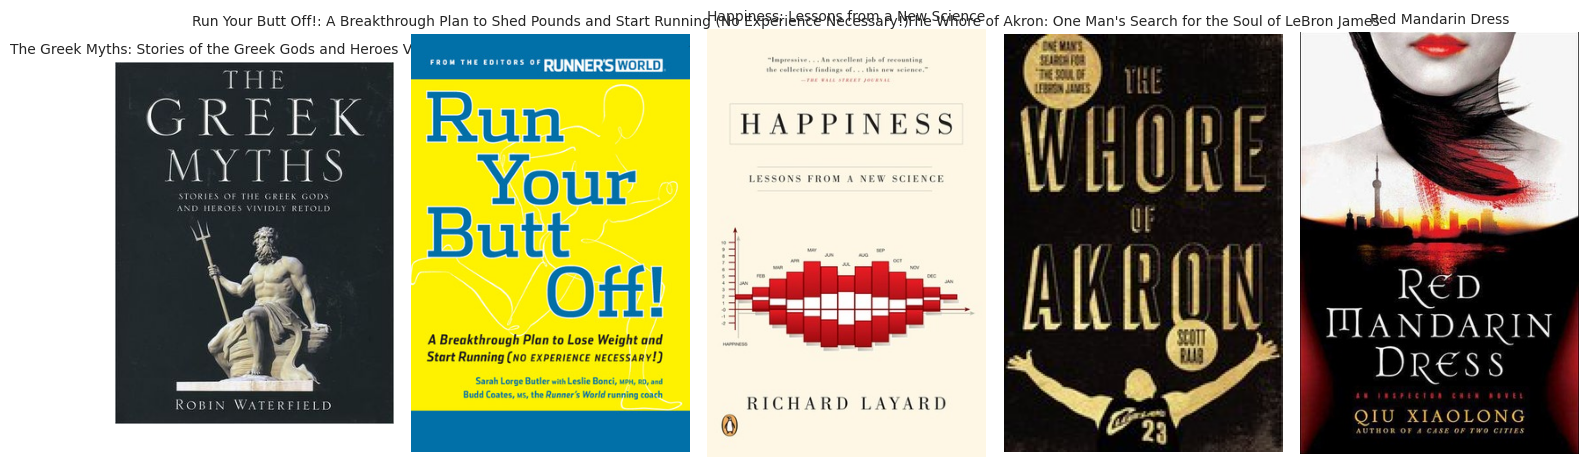

In [26]:
# Preprocess the data
def preprocess_data(final_books):
    # Ensure no missing values
    final_books = final_books.dropna()

    # Encode categorical variables
    le_author = LabelEncoder()
    final_books['Author_Encoded'] = le_author.fit_transform(final_books['Author'])

    # Define features for similarity
    features = ['Rating', 'No. of Ratings', 'Pages', 'user_rating', 'Author_Encoded']

    # Normalize the features
    scaler = StandardScaler()
    X = scaler.fit_transform(final_books[features])

    return final_books, X

# Fit the Nearest Neighbors model
def train_knn(X, n_neighbors=6):
    knn = NearestNeighbors(n_neighbors=n_neighbors, metric='euclidean')
    knn.fit(X)
    return knn

# Function to find similar books
def find_similar_books(book_title, final_books, knn, X, n=5):
    # Find the index of the book
    book_index = final_books[final_books['Title'] == book_title].index[0]

    # Find neighbors
    distances, indices = knn.kneighbors([X[book_index]], n_neighbors=n + 1)  # +1 to include the book itself
    similar_books = final_books.iloc[indices[0][1:]]  # Exclude the book itself

    return similar_books[['Title', 'Author', 'Rating', 'Genre', 'Pages', 'Description', 'Image']]

def display_similar_books_text(book_title, final_books, knn, X, n=5):
    similar_books = find_similar_books(book_title, final_books, knn, X, n)

    print(f"\nBooks similar to '{book_title}':\n")

    # Display each book's details as plain text
    for idx, row in similar_books.iterrows():
        print(f"Title: {row['Title']}")
        print(f"Author: {row['Author']}")
        print(f"Rating: {row['Rating']} (out of 5)")
        print(f"Genre: {row['Genre']}")
        print(f"Pages: {row['Pages']}")
        print(f"Description: {row['Description']}")
        print("-" * 80)

def display_images_from_dataframe(df, n=5 ):
    plt.figure(figsize=(15, 5))  # Adjust figure size

    for i, (idx, row) in enumerate(df.head(n).iterrows()):  # Enumerate to ensure sequential indexing
        image_url = row['Image']
        try:
            # Fetch the image from the URL
            response = requests.get(image_url)
            response.raise_for_status()

            # Open the image using Pillow
            img = Image.open(BytesIO(response.content))

            # Display the image inline with matplotlib
            plt.subplot(1, n, i + 1)  # Create a subplot for each image
            plt.imshow(img)
            plt.title(row['Title'], fontsize=10)  # Show the book title as the title of the image
            plt.axis('off')  # Turn off axes for better visualization
        except Exception as e:
            print(f"Error displaying image for '{row['Title']}': {e}")

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Step 2: Preprocess the data
final_books, X = preprocess_data(final_books)

# Step 3: Train the KNN model
knn = train_knn(X, n_neighbors=6)

# Step 4: Display similar books
book_title = "Between Good and Evil: A Master Profiler's Hunt for Society's Most Violent Predators"
similar_books = find_similar_books(book_title, final_books, knn, X, 5)
display_similar_books_text(book_title, final_books, knn, X, n=5)
display_images_from_dataframe(similar_books, n=5)


In [27]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Colab Notebooks/Bookreccomendations.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Bookreccomendations.ipynb to html
[NbConvertApp] Writing 354090 bytes to /content/drive/MyDrive/Colab Notebooks/Bookreccomendations.html
